<a href="https://colab.research.google.com/github/ing-LuisHerrera/ClasificadorReincidencia/blob/main/Reincidencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universidad de ibagué - Proyecto TUPU
por: Luis David Herrera y Jeisson Santiago Cortes
<hr></hr>

**Resumen**

En el presente documento se dará solucion y analisis a una problematica planteada por google analythics que consiste en la determinante de un evento para que un usuario se pueda considerar como posible recomprador (Sujeto reincidente) 








**Introduccion**

En las empresas existen cada dia diversos problemas para resolver, se multiplican por cada tecnologia que estas utilicen. En este caso particular se atacara al problema de reincidencia que consiste en determinar a partir de un comportamiento del cliente si este volvera a entrar, volvera a comprar o presentará interes en algo en especifico. 

Sabiendo cuando un cliente es reincidente es posible tratar a este cliente de una manera mas personalizada, como ofreciendole descuentos, promociones, articulos de su interes o para hacer toma de datos estadisticos las utilidades son muchas y son de bastante apoyo para una empresa que quiera utilizar la gran mayoria de herrramientas a su disposicion. 

Estas tecnicas las viene utilizando empresas grandes como google que trabajan la informacion de sus usuarios en una dependencia llamada google analythics que se fundo con el proposito de generar valor con la informacion del entorno, de la red y de la que constantemente es alimentada dia tras dia el servidor principal o sus servidores de soporte para servicios exclusivos.

Gracias a estas metricas y analisis de informacion se han logrado incrementar las ventas, la calidad de trato con el usuario y la experiencia de investigacion agilizandola y haciendola mas eficiente.

**Marco Teorico**

Para poder dar solucion a este problema se utilizara conocimiento y asistencia en AI(agentes inteligentes), los cuales tienen propiedades para poder trabajar con librerias y algoritmos que dan soluciones muy cercanas a lo optimo.

se decidio que el problema tiene caracterisiticas fundamentales para ser trabajado como un problema de clasificadores. eso significa que tendremos que alimentar el agente para que aprenda a clasificar y segmentar lo aprendido en un proceso de regresion lineal para dar presicion y certeza de las predicciones que se le solicite hacer.

Se hara uso de las siguientes librerias :


In [ ]:
#Librerias de python para trabajar 
import array as arr
import sqlite3 as sql #importanto SQLITE3
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from scipy import stats # importando scipy.stats
import seaborn as sns

Dentro de las librerias se tendran unas de soporte para hacer un podado/filtrado de la informacion que retorne de la base de datos, dado que no toda la informacion almacenada es requerida y por eso se debe seleccionar la que si pueda interpretar el clasificador.

Entre estas se puede ver array, sqlitem, pandas para hacer manejo de la informacion de informacion obtenida mediante una base de datos sql o una ya guardada en csv, con los los dataframe de pandas se puede manejar de mejor forma la informacion, hacer busquedas entre otras.

La libreria fundamental que se va a emplear en el proyecto es Scikit.learn de sklearn donde se utilizara el metodo sklearn.tree.DecisionTreeClassifier() que recibira por parametro las etiquetas que debe de aprender y adjunto los valores que estos tienen para poder realizar la regrecion lineal y separar los datos en categorias.



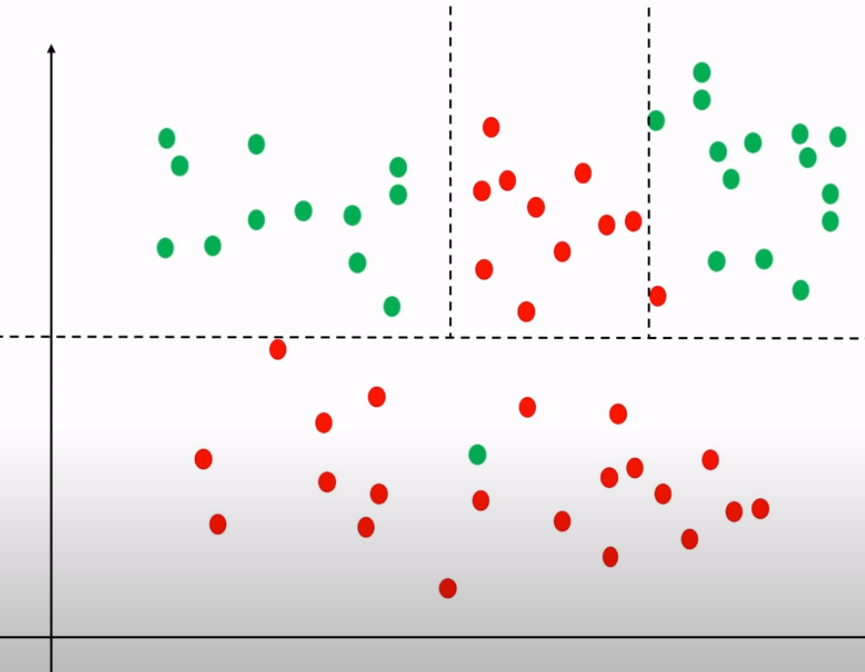




En la grafica anterior se puede observar de manera un poco mas vaga pero detallada como funciona el clasificador, la ubicacion de los puntos representan el evento, el color verde y rojo la reincidencia del evento puntual o no respectivamente, las lineas imaginarias representan la categoria.

De tal forma que que si tenemos una categoria A, de un evento X, donde su reincidencia sea en su mayoria verde podemos estar hablando de un comportamiento reincidente y de la misma forma es proporcional a la cantidad de aciertos o desaciertos para determinar dicha probabilidad.

El clasificador al momento de codificar todas las etiquetas o atributos que debe aprender deben de ser convertidos a valor numerico para que se pueda enteder dentro del codigo dado que el clasifciador no entiende valores que no sean numericos.

**Problematica**

Se quiere determinar dado un evento si un usuario será reincidente o no, para ello se cuenta con una base de datos llena de comportamientos de usuarios reincidentes y no reincidentes al momento de realizar compras en una pagina web.

que sea reincidente significa que este usuario pueda comprar nuevamente en la pagina.

**Planteamiento y desarrollo**

Antes de cualquier proceso o calculo se debe asegurar que la base de datos o el archivo que contenga la informacion de los usuarios este listo para trabajar, con esto se refiere a que se debe eliminar cualquier informacion que no sea util y adaptar el archivo a formatos de trabajo para evitar inconvenientes futuros.

A este proceso se le puede conocer como podar y conciste en eliminar celdas vacias, valores mal digitados, cambiar nombres de columnas dificiles para trabajar... entre otros casos.

Una vez lista la informacion base, se importará al proyecto de esta manera como una conexion de bases de datos SQL:


In [ ]:
#crea conexion a la base de datos SQLITE reportes y recurrentes
database = "data/datebayo.db" # seleccionar la Base de datos "database.db"
connection = sql.connect(database)

Se debe testear la base de datos y para ello se formula una consulta a la tabla donde se aprovechará y se hará una conversion a dataframe para visualizar de mejor forma la informacion consultada.

In [ ]:
#Probando conexion

#Query prueba
query = 'SELECT * FROM reportesito'

#Guardando la consulta en un dataframe (consulta, conexion)
#dataframeres = pd.read_sql_query(query,connectionReportes)
data = pd.read_sql_query(query,connection)

#Imprimiento el dataframe
data.head()

,Category,Action,Total,Recurrent
0,IREQUEST,Approvals task done,1,0
1,IREQUEST,Content task done,2,0
2,IREQUEST,Header task done,2,0
3,IREQUEST,Order task done,1,0
4,IREQUEST,Publish Draft,1,0


El data frame muestra una conexion y una conversion existosa.

Lo siguiente será dividir la informacion en 2 data frames, uno contendra los objetivos (Recurrent) y el otro tendra los atributos para clasificar (Category, Action, Total).

In [ ]:
#Se divide el dataframe en 2 secciones la columna objetivo y la columna de entrada

inputs = data.drop('Recurrent', axis='columns')
target = data['Recurrent']

El data frame que contiene los atributos tiene valores que no son numericos por ende el clasificador no entenderá el aprendizaje, con ayuda de una libreria auxiliar de sklearn (LabelEncoder) se podra convertir los nombres de las categorias y de los eventos a valor numerico de esta forma:

In [ ]:
# traducir el contenido para que el clasificador lo pueda interpretar
# se hace un label encoder para categorizar los labels en numeros 

from sklearn.preprocessing import LabelEncoder

le_category = LabelEncoder()
le_action = LabelEncoder()

inputs['category_n'] = le_category.fit_transform(inputs['Category'])
inputs['action_n'] = le_action.fit_transform(inputs['Action'])

inputs_n = inputs.drop(['Category','Action'], axis = 'columns')
inputs_n

,Total,category_n,action_n
0,1,5,0
1,2,5,2
2,2,5,13
3,1,5,16
4,1,5,18
...,...,...,...
5875,1,5,2
5876,1,5,13
5877,1,5,16
5878,1,5,18


Se observa que category y action ahora son numeros, el resultado sale como se esperaba, ahora se puede asociar por ejemplo la categoria REQUEST al numero 5 y sus eventos a otros numeros relacionados.

Ahora se procede a crear el clasificador y enseñarle, se hace de la siguiente manera:

In [ ]:
#Intanciando el clasificador y enseñandole la informacion
model = tree.DecisionTreeClassifier() 
model.fit(inputs_n,target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Inputs_n : atributos

target : valores de reincidencia

El clasificador está listo para predecir pero antes se debe observar que porcentaje de precision tiene el modelo, se hace de la siguiente forma:

In [ ]:
model.score(inputs_n,target)

0.7557823129251701

con esto se concluye que el modelo tiene una fiabilidad regular, esto se puede cambiar si se alimenta con mas o menos informacion, pero se podria caer en problemas como el sobreaprendizaje y de igual forma al revez. solo se puede hacer al tanteo probando quitando o añadiendo hasta tener un modelo mas fiable al menos con el 90%

Clasificacion de prueba
prediccion: VecesRealizado : 5, Categoria : REQUEST, Evento : Login

In [ ]:
model.predict([[5,5,0]])

array([1])

Clasificacion de prueba Prediccion: VecesRealizado : 1, Categoria : REQUEST, Evento : Login


In [ ]:
model.predict([[1,5,0]])

array([0])

**Conclusion**

Ademas del podado de la base de datos se necesito los algoritmos necesarios para poder hacer la prediccion. Para este fin se ultilizaron las distintas herramientas desarrolladas en el lenguaje python. Entre las cuales se incluyeron librerias y marcos de trabajo. Por ultimo para se necesito un  buen uso de la herramienta de tree classifier. Esto ultimo nos permitio de cierta forma predecir que persona dependiendo de sus acciones pueden ser reincidentes. A estudios futuros se puede agregar mas atributos pero no sin antes inyectar o eliminar datos hasta lograr un modelo mas confiable.




**Bibliografia**

Scikit-learn:

*   https://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html
*   https://scikit-learn.org/stable/about.html

Video tutorial:


*   https://www.youtube.com/watch?v=PHxYNGo8NcI








**NOTAS**

Para hacer funcionar el proyecto se debe crear una carpeta llamada data y en ella cargar la base de datos :
https://drive.google.com/file/d/1cy4-OHdJsLv7m-fHEU9esfOicPLuKjwm/view?usp=sharing
posteriormente se procede a ejecutar cada una de las lineas de codigo en ordern (1-9) la 8 y 9 son los modelos de prediccion estos pueden ser alterados al gusto del espectador.